# Political Spectrum

## Submitted by:

* `Chirag Bansal - C0908045`<br>
* `Sahibpreet Singh - C0928040`<br>
* `Suril Purohit – C0928435`<br>
* `Balpreet Singh – C0924974`<br>
* `Dhrumil Tarde – C0926130`


* A NLP based project to detect whether the news which is given is inclined towards `Left` or `Righrt` or `Center`. We planned to developed this project, as we all know that in this world right now everyone publish a news according to their own intrest but as an audience it is very important to detect if news is highly biased or not. 

* To start with this project initially we have to figure out from where we scrape the data and what are the reliable source.So, after searching all over the internet we found this amazing website `allsides.com`. In this website we got all the three types together for each news.

* **Step One** - Scraping Data, To scrape the data go thorugh a long thought process, reason for that is, if we scrape directly form the website page we get a lot of junk with it to and also we were not able to get news details properly. To solve this problem we initially scrape all the 12K news links from `allsides.com's` first 100 pages and same them into a pickle dump. Then we again scrape these links one by one and save the the sides `Left`, `Right`, `Center` into a csv file. By using this data we get a benifit that our data is completly balanced which lead to a unbiased training. So, after scraping the data we get a  12k rows and 3 columns. So before going to our next step we convert it into 36k rows by 2 column dataset where column one is label and column two is news, we did so that we can perform NLP tasks properly on it. 

* **Step two** - At step two we did EDA and Text pre-processing together, Initially we start with distribution plot for each category to show that data is exactly balanced. As we move forward, we start doing pre-processing, we create a function `clean_text` we which convert the sentence into lower case first, then remove the `[ ], < >, links, punctuation, newline character and words contain digit` all together and then as we move forward we `Analyze the each news length` and then plot a Distribution plot using ploty.

* **Step three** - In this step we analyze top most comman `stopwords` from all three categories and after analysis we found that the most comman stop words for each category is almost same. Ater that we move forward with the most frequent words for each class and surprisingly top 3 frequent words for each category are same irrespective to the positioning. Then we did the N-Gram analysis for `bigram` and `trigram` and plot top 50 bi and tri grams accordingly. Moving forward from this analysis we remove all the stopwords next from our data but before that we tokenize our data followed by stopword removal. Next to this step we start with our one of the most important step which is `Text Normalization`, in thos step we normalize the data using `Lemmitization` using wordnet.verbs. 

* **Step four** - As we are moving step by step and making our data more cleaned for our modeling, we reached to our last step now which is Embedding and model but before that we did our last visualization which is Word Cloud, to show the most used words for each category. Now after this we convert our data into numbers - 
	- Method one - `BoW with Logistic Regression` - in this firstly we convert the text into using Bag of word technique, which give use a sparse matrix of 0's and 1's, in BoW we uses max features = `5000` and and we run Logistic regression on it. we got an f1-score of '0.4070'
	- Method two - `BoW with Naive Byes` - This model give us an f1-score of '0.4117'
	- Method three - `BoW with Xgboost` - This model give us worst f1-score of '0.1841'
	
	- Method four - `TF-IDF with Logistic Regression` - In this method we convert the text into numbers, usiing the `term frequency- inverse frequency document frequency` technique and then we convert it into a dense vector for better results. After doing it we use vanilla Logistic Regression which give us f1-score of '0.4228'
	- Method five - `TF-IDF with Naive Byes` - Again we are using TF-IDF vectors and then use Naive Byes on it. This Model give us our best f1-Score of '0.4147'
	- Method six - `TF-IDF with Xgboost` - This method give us a f1-score of '0.2376'

	- Method seven - `S-Bert with Xgboost` - In this we use S-Bert's pre trained embeddings to convert the text into embedding vectors first then again we use Xgboost first which give us f1-score not good enough but around '0.3295'
	- Method eight - `S-Bert with Logistic Regression` - Again with the help of S-Bert's embedding we use logistic regression model which throw an f1-score of '0.3352' 
		

##### This notebook is runnig on an `Anaconda Base envirionmenrt` of Python 3.11.5

## Importing all the necessary libraries

In [99]:
import nest_asyncio
nest_asyncio.apply()
import requests

In [100]:
# Download the spacy's small english pipline trained on written web text (blogs, news, comments)
!python -m spacy download en_core_web_sm 

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------- 0.0/12.8 MB 435.7 kB/s eta 0:00:30
      --------------------------------------- 0.3/12.8 MB 2.4 MB/s eta 0:00:06
     -- ------------------------------------- 0.9/12.8 MB 5.6 MB/s eta 0:00:03
     ---- ----------------------------------- 1.6/12.8 MB 8.3 MB/s eta 0:00:02
     ------- -------------------------------- 2.4/12.8 MB 10.1 MB/s eta 0:00:02
     --------- ------------------------------ 3.1/12.8 MB 11.2 MB/s eta 0:00:01
     ------------ --------------------------- 4.0/12.8 MB 12.8 MB/s eta 0:00:01
     --------------- ------------------------ 4.9/12.8 MB 13.7 MB/s eta 0:00:01
     ------------------ --------------------- 5.9/12.8 MB 14.5 MB/s eta 0:00:01
     --------------------- ------------------ 6.9/12.8 MB 15.3 MB/s eta 0:00:01
     ------------------------ --------------- 7.7/12.8 MB 1

In [101]:
import pandas as pd
import bs4 as bs
from bs4 import BeautifulSoup
import spacy
import requests
import seaborn as sns
from spacy.lang.en import stop_words
import plotly.graph_objects as go
from tqdm import tqdm
import re
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

#sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score
from sklearn import preprocessing, decomposition, model_selection, metrics, pipeline
from sklearn.model_selection import GridSearchCV,StratifiedKFold,RandomizedSearchCV

import string
import urllib.request
import shutup
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import defaultdict , Counter
from tqdm import tqdm
import numpy as np
from nltk.corpus import stopwords
from spacy.lang.en import English

shutup.please()

# Download WordNet
nltk.download('wordnet')

nlp = spacy.load('en_core_web_sm')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\chira\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [102]:
# Storing all the stopwords from nltk and spacy into variables 
nltk_stop = stopwords.words('english')

spacy_stop = list(stop_words.STOP_WORDS)

#combining stopwords from spacy and nltk 
#because Spacy has some more words so to remove all the common stopwords
stop = list(set(nltk_stop+spacy_stop))

In [ ]:
# Root url from where all the initial scraping with done and stored into the Pickle file
url_root = 'https://www.allsides.com/'

# combining the root url with the extended url so that we can increment the page numbers 
url_page = url_root + 'story/admin?page='

# initial page number
tab_num = 0

# loop over pages
# we are going to scrape the first 100 pages 

# A list to store the urls of all the news articles.
dfs = []
for tab_num in tqdm(range(100)):
    # read in the source
    try:
        source = urllib.request.urlopen(url_page + str(tab_num))
        sp = bs.BeautifulSoup(source, 'lxml')
        table = sp.table
        df = pd.read_html(str(table), encoding='utf-8',
                          header=0)[0]  # read table with no links

        # get links
        links = []
        for tag in table.find_all('a'):
            if tag.has_attr('href'):
                link = tag.get('href')
                if '/story' in link:
                    links.append(link)
            else:
                print(f'error! missing a link for {link}')
        df['url_story'] = links
        dfs.append(df)
    except:
        print(f'stopped after {tab_num} pages')
        break

df = pd.concat(dfs)

# Save the dataframe to a pickle file
df.to_pickle('df_links.pkl')

In [ ]:
# Reading the Pickle files to scrape them again to get `Left`, `Right`, `Center` news
data_of_links = pd.read_pickle('df_links.pkl')

In [ ]:

# Function to extract the news from url's
def extract_content_from_url(url):
    response = requests.get(url)
    if response.status_code != 200:
        print(f"Failed to retrieve the content from {url}. Status code: {response.status_code}")
        return None

    soup = BeautifulSoup(response.content, 'html.parser')
    columns = {"left": [], "center": [], "right": []}
    
    for key in columns.keys():
        divs = soup.find_all('div', class_=f'news-item {key}')
        for div in divs:
            body_contents = div.find('div', class_='body-contents')
            if body_contents:
                paragraphs = body_contents.find_all('p')
                for paragraph in paragraphs:
                    columns[key].append(paragraph.text)
    
    return columns

def scrape_multiple_urls(urls):
    all_data = {"left": [], "center": [], "right": []}
    
    for url in tqdm(urls):
        content = extract_content_from_url(url)
        if content:
            for key in all_data.keys():
                all_data[key].extend(content[key])
    
    # Find the maximum length of columns
    max_length = max(len(all_data["left"]), len(all_data["center"]), len(all_data["right"]))
    
    # Pad the shorter lists with empty strings
    for key in all_data.keys():
        while len(all_data[key]) < max_length:
            all_data[key].append("")
    
    # Create DataFrame
    df = pd.DataFrame(all_data)
    
    # Filter rows where all columns have values
    df_filtered = df[df[['left', 'center', 'right']].apply(lambda x: all(x.str.strip() != ""), axis=1)]

    return df_filtered

urls=[]
for i in range(len(data_of_links)):
    url = 'https://www.allsides.com'+data_of_links.iloc[i]['url_story']
    urls.append(url)

print(len(urls))
# Scrape content and create DataFrame
df = scrape_multiple_urls(urls)



In [ ]:
# Save them as a CSV
df.to_csv('allsides.csv')

### Reading `Data`

In [103]:

# Reading the CSV file
df = pd.read_csv('allsides.csv')

In [104]:
# Selecting only three columns
df = df[['left','center','right']]
df.head(3)

,left,center,right
0,Four Israeli hostages who were held by Hamas w...,The Hamas-run health ministry in Gaza says an ...,Israeli security forces rescued four hostages ...
1,Why it matters: The military operation took pl...,"On Saturday Israel's forces, backed by air str...",The rescued hostages were found in good medica...
2,The four hostages who were rescued are Noa Arg...,"Noa Argamani, 26, Almog Meir Jan, 22, Andrei K...",The Hill fired its progressive online show hos...


In [105]:
# Checking the shape of dataframe
df.shape

(12167, 3)

In [106]:
# Initialize an empty list to store expanded rows
expanded_rows = []

# Iterate through each row of the original dataframe
for index, row in df.iterrows():
    # Create a new row for 'left'
    left_row = {'label': 'left', 'value': row['left']}
    expanded_rows.append(left_row)
    
    # Create a new row for 'center'
    center_row = {'label': 'center', 'value': row['center']}
    expanded_rows.append(center_row)
    
    # Create a new row for 'right'
    right_row = {'label': 'right', 'value': row['right']}
    expanded_rows.append(right_row)

# creating a new dataframe
expanded_df = pd.DataFrame(expanded_rows)

expanded_df.head(10)



,label,value
0,left,Four Israeli hostages who were held by Hamas w...
1,center,The Hamas-run health ministry in Gaza says an ...
2,right,Israeli security forces rescued four hostages ...
3,left,Why it matters: The military operation took pl...
4,center,"On Saturday Israel's forces, backed by air str..."
5,right,The rescued hostages were found in good medica...
6,left,The four hostages who were rescued are Noa Arg...
7,center,"Noa Argamani, 26, Almog Meir Jan, 22, Andrei K..."
8,right,The Hill fired its progressive online show hos...
9,left,American commentator Briahna Joy Gray was fire...


In [107]:
#renaming the data
df = expanded_df

In [108]:
## shuffle dataframe
df = df.sample(frac=1)
df.head(10)

,label,value
1746,left,In one camp is a tech billionaire with more th...
6272,right,The state representatives’ aim is to fight bac...
15830,right,"Hersh, a Pulitzer Prize-winning investigative ..."
16398,left,Microsoft recognized its first labor union in ...
850,center,Faint traces of a giant moment that has shocke...
31635,left,"In a phone interview with CNN, Stilley said he..."
25814,right,"Russia’s state media regulator, Roskomnadzor, ..."
17483,right,“This will be said only once: If you clearly a...
8028,left,"Over decades, a succession of immune Israeli g..."
5496,left,"""Well, I can't tell you that, really,"" Trump t..."


# EDA

### Data Distribution


In [109]:
# Calculating number of sentences for each label
label_counts = df['label'].value_counts()

# bar graph using Plotly
fig = go.Figure(data=[go.Bar(
    x=label_counts.index,  # x-axis labels (labels)
    y=label_counts.values,  # y-axis values (counts)
    marker_color='royalblue'  # color of bars
)])

# customizing layout
fig.update_layout(
    title='Number of Sentences for Each Label',
    xaxis_title='Label',
    yaxis_title='Number of Sentences',
    xaxis={'categoryorder': 'total descending'}  # sort x-axis labels by total descending
)

# plot
fig.show()

#### This shows data is equally distributed in all 3 categories `left`, `right` and `center`

## Text Cleaning

In [110]:
# A function to clean the data and remove all the square brackets, remove links, angular brackets, punctuations, and words containing numbers
def clean_text(text):
    '''Make text lowercase'''
    text = text.lower()
    
    '''Remove text in square brackets'''
    text = re.sub('\[.*?\]', '', text)
    
    '''Remove links'''
    text = re.sub('https?://\S+|www\.\S+', '', text)
    
    '''Remove text between angular brackets'''
    text = re.sub('<.*?>+', '', text)
    
    '''Remove punctuation'''
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    
    '''Remove newline characters'''
    text = re.sub('\n', '', text)
    
    '''Remove words containing numbers'''
    text = re.sub('\w*\d\w*', '', text)
    
    return text

In [117]:
#  Applying the clean_text function using lambda function on the news column
df['value'] = df['value'].apply(lambda x : clean_text(x))

In [118]:
df.head()

,label,value,len
1746,left,in one camp is a tech billionaire with more th...,179
6272,right,the state representatives’ aim is to fight bac...,115
15830,right,hersh a pulitzer prizewinning investigative jo...,341
16398,left,microsoft recognized its first labor union in ...,211
850,center,faint traces of a giant moment that has shocke...,110


##  Length of each text

In [119]:
# creating a function to count the length of each sentence 
def length(text):    
    ''' function to returns the length of text'''
    return len(text)

In [120]:
# Length function implementation
df['len'] = df['value'].apply(lambda x  : length(x))
df.head()

,label,value,len
1746,left,in one camp is a tech billionaire with more th...,171
6272,right,the state representatives’ aim is to fight bac...,111
15830,right,hersh a pulitzer prizewinning investigative jo...,335
16398,left,microsoft recognized its first labor union in ...,208
850,center,faint traces of a giant moment that has shocke...,108


## Length Analysis of each category

In [122]:
# Create histogram using Plotly
fig = go.Figure()

# Add histograms for each label
for label in ['left', 'center', 'right']:
    fig.add_trace(go.Histogram(x=df[df['label'] == label]['len'], name=label))

# Customize layout
fig.update_layout(
    title='Distribution of Text Length for Each Label',
    xaxis_title='Text Length',
    yaxis_title='Count',
    barmode='overlay'  # Overlay histograms for better comparison
)

# Show plot
fig.show()

1. The above plot gives us an idea that `Avg length` of each type of comment from each category is nearly same and not much of a difference between `Avg length` so using `len` alongside `embeddings` of the text might not be a good idea.

## Analysing `Stop words` from each Category.

In [123]:
# Creating a function to create a corpus of each category which help us in further visualization 
def create_corpus(target):
    corpus=[]
    
    for x in df[df['label']==target]['value'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

## Analysing Stop words in Each Category

1. Left
2. Center
3. Right

## `Left`

In [124]:
# Use of Corpus function on `Left`
corpus=create_corpus('left')

# Creating a dictionary to store the frequency of each stop word in the corpus
dic=defaultdict(int)
# using a for loop to get the frequency of each stop word
for word in corpus:
    if word in stop:  # if word is in the list of stopwords which we stored in the `stop` then it will store in the our dict
        dic[word]+=1

# Sorting it and storing top 10 most frequent stop word      
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10]

<BarContainer object of 10 artists>

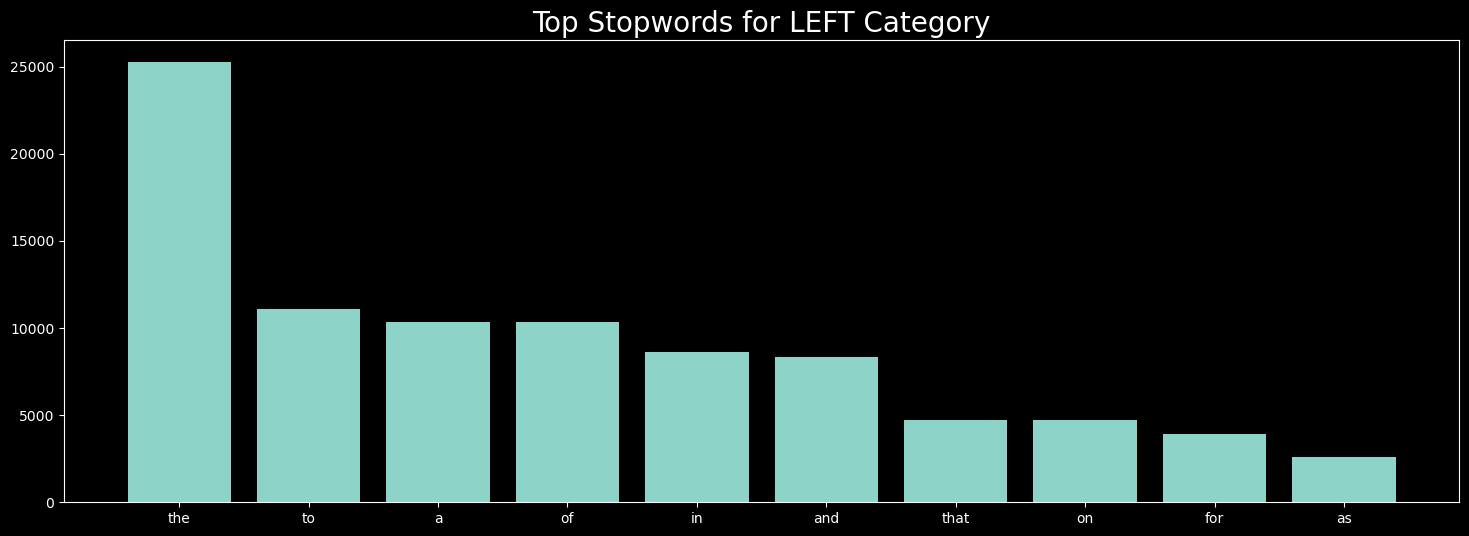

In [125]:

# Bar plot for top 10 most frequent stopwords in `Left`
plt.rcParams['figure.figsize'] = (18.0, 6.0)
plt.title('Top Stopwords for LEFT Category',fontsize=20)
x,y=zip(*top)
plt.bar(x,y)

## `Center`

In [126]:
# Use of Corpus function on `Center`
corpus=create_corpus('center')

# Creating a dictionary to store the frequency of each stop word in the corpus
dic=defaultdict(int)
# using a for loop to get the frequency of each stop word
for word in corpus:
    if word in stop:  # if word is in the list of stopwords which we stored in the `stop` then it will store in the our dict
        dic[word]+=1
        
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10]

<BarContainer object of 10 artists>

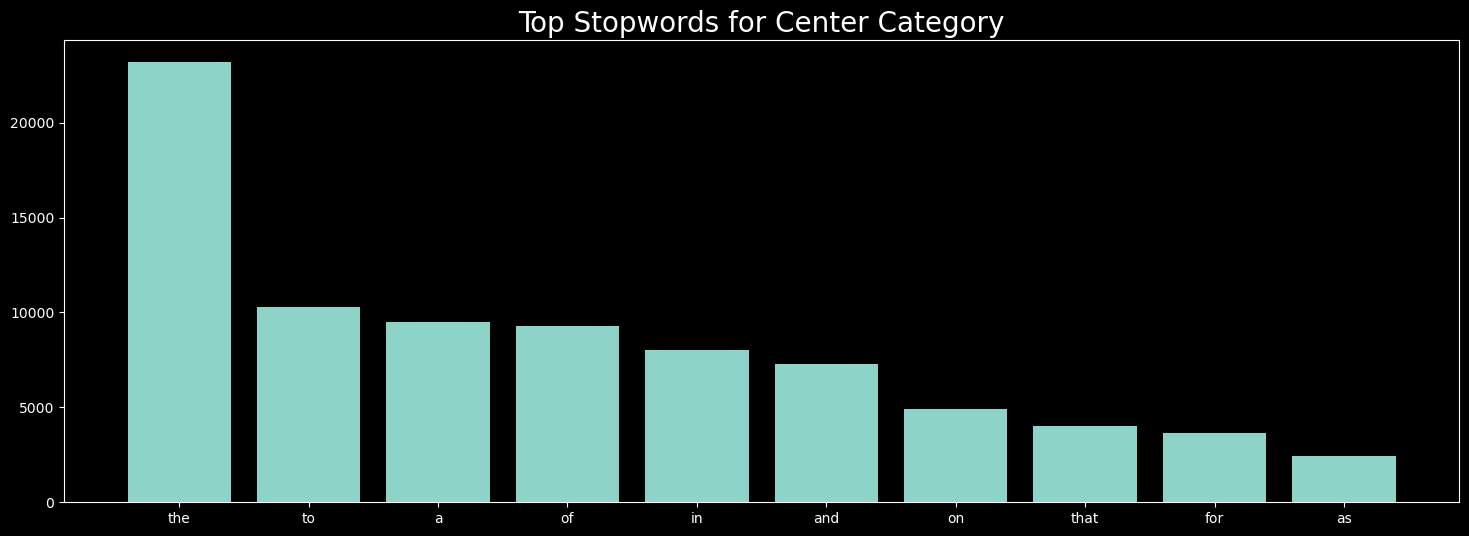

In [127]:

# Bar plot for top 10 most frequent stopwords in `Center`
plt.rcParams['figure.figsize'] = (18.0, 6.0)
plt.title('Top Stopwords for Center Category',fontsize=20)
x,y=zip(*top)
plt.bar(x,y)

## `Right`

In [128]:
# Use of Corpus function on `Right`
corpus=create_corpus('right')

# Creating a dictionary to store the frequency of each stop word in the corpus
dic=defaultdict(int)
# using a for loop to get the frequency of each stop word
for word in corpus:
    if word in stop:  # if word is in the list of stopwords which we stored in the `stop` then it will store in the our dict
        dic[word]+=1
        
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10]

<BarContainer object of 10 artists>

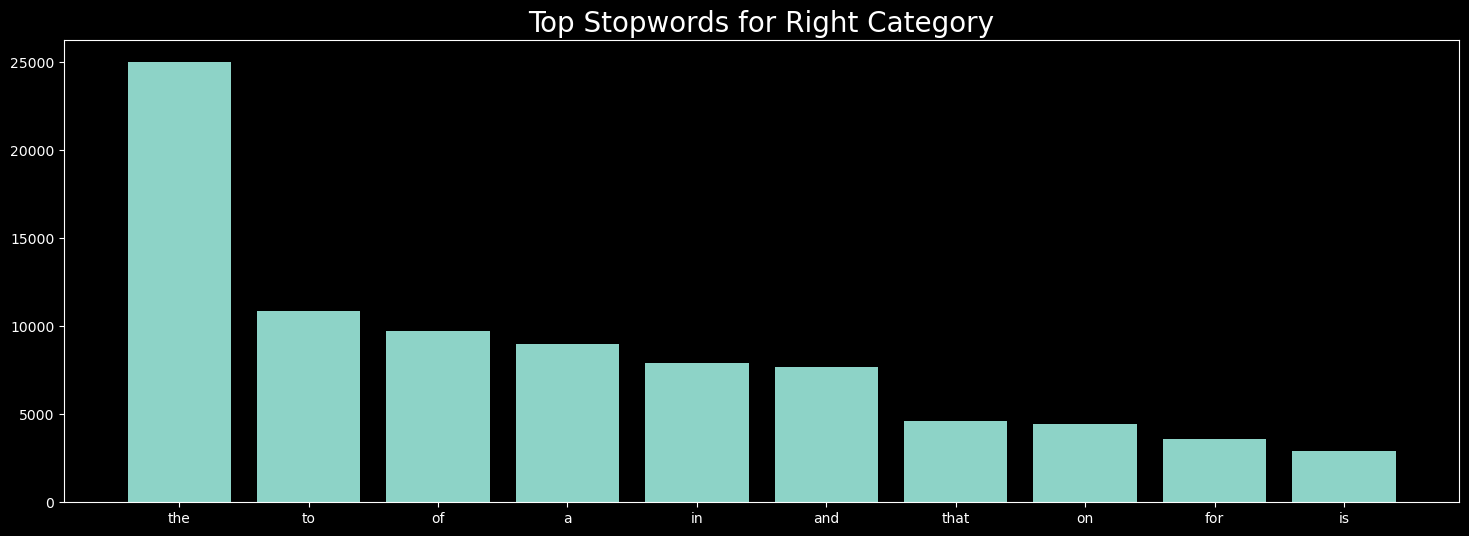

In [129]:

# Bar plot for top 10 most frequent stopwords in `Left`
plt.rcParams['figure.figsize'] = (18.0, 6.0)
plt.title('Top Stopwords for Right Category',fontsize=20)
x,y=zip(*top)
plt.bar(x,y)

### Takeaway

1. `the`,`to`,`of`,`and` etc.  are most common stopwords in each category which we will ultimately remove in further steps.

## <strong>*Most Common Words in Each category*</strong>

## `Left`

In [130]:
# Use of Corpus function on `Left`
corpus=create_corpus('left')

# Using the counter function to count the frequency of each word
counter=Counter(corpus)

# Storing the most common words in the corpus
most=counter.most_common()
x=[]
y=[]


for word,count in most[:40]:
    if (word not in stop) :
        x.append(word)
        y.append(count)


In [131]:
# a bar plot to show the most comman words
fig = go.Figure([go.Bar(x=x, y=y)])
# Change the bar mode
fig.update_layout(title='Most Common words on `Left` side')
fig.show()

## `Center`

In [132]:
# Use of Corpus function on `Center`
corpus=create_corpus('center')

# Using the counter function to count the frequency of each word
counter=Counter(corpus)

# Storing the most common words in the corpus
most=counter.most_common()
x=[]
y=[]


for word,count in most[:40]:
    if (word not in stop) :
        x.append(word)
        y.append(count)

        
# a bar plot to show the most comman words
fig = go.Figure([go.Bar(x=x, y=y)])
# Change the bar mode
fig.update_layout(title='Most Common words on "CENTER" side')
fig.show()

## `Right`

In [133]:
# Use of Corpus function on `Right`
corpus=create_corpus('right')

# Using the counter function to count the frequency of each word
counter=Counter(corpus)

# Storing the most common words in the corpus
most=counter.most_common()
x=[]
y=[]


for word,count in most[:40]:
    if (word not in stop) :
        x.append(word)
        y.append(count)


# a bar plot to show the most comman words        
fig = go.Figure([go.Bar(x=x, y=y)])
# Change the bar mode
fig.update_layout(title='Most Common words on "RIGHT" side')
fig.show()

### Takeaways

1. `president`,`biden` and `trump` are most common words in each category

# N-Gram Analysis

In [134]:
#  Define a function for n-gram analysis
def gram(text,n_gram=1):
    token = [token for token in text.lower().split(' ') if token != '' if token not in stop]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [' '.join(ngram) for ngram in ngrams]

In [154]:
# Initialize value to plot the top 50 n-gram words
N = 50

# bigrams
left_bigrams = defaultdict(int)
center_bigrams = defaultdict(int)
right_bigrams = defaultdict(int)

for text in df[df['label']=='left']['value']:
    for word in gram(text,n_gram=2):
        left_bigrams[word] += 1

for text in df[df['label']=='center']['value']:
    for word in gram(text,n_gram=2):
        center_bigrams[word] += 1

for text in df[df['label']=='right']['value']:
    for word in gram(text,n_gram=2):
        right_bigrams[word] += 1


df_left_bigrams = pd.DataFrame(sorted(left_bigrams.items(), key=lambda x: x[1])[::-1])
df_center_bigrams = pd.DataFrame(sorted(center_bigrams.items(), key=lambda x: x[1])[::-1])
df_right_bigrams = pd.DataFrame(sorted(right_bigrams.items(), key=lambda x: x[1])[::-1])

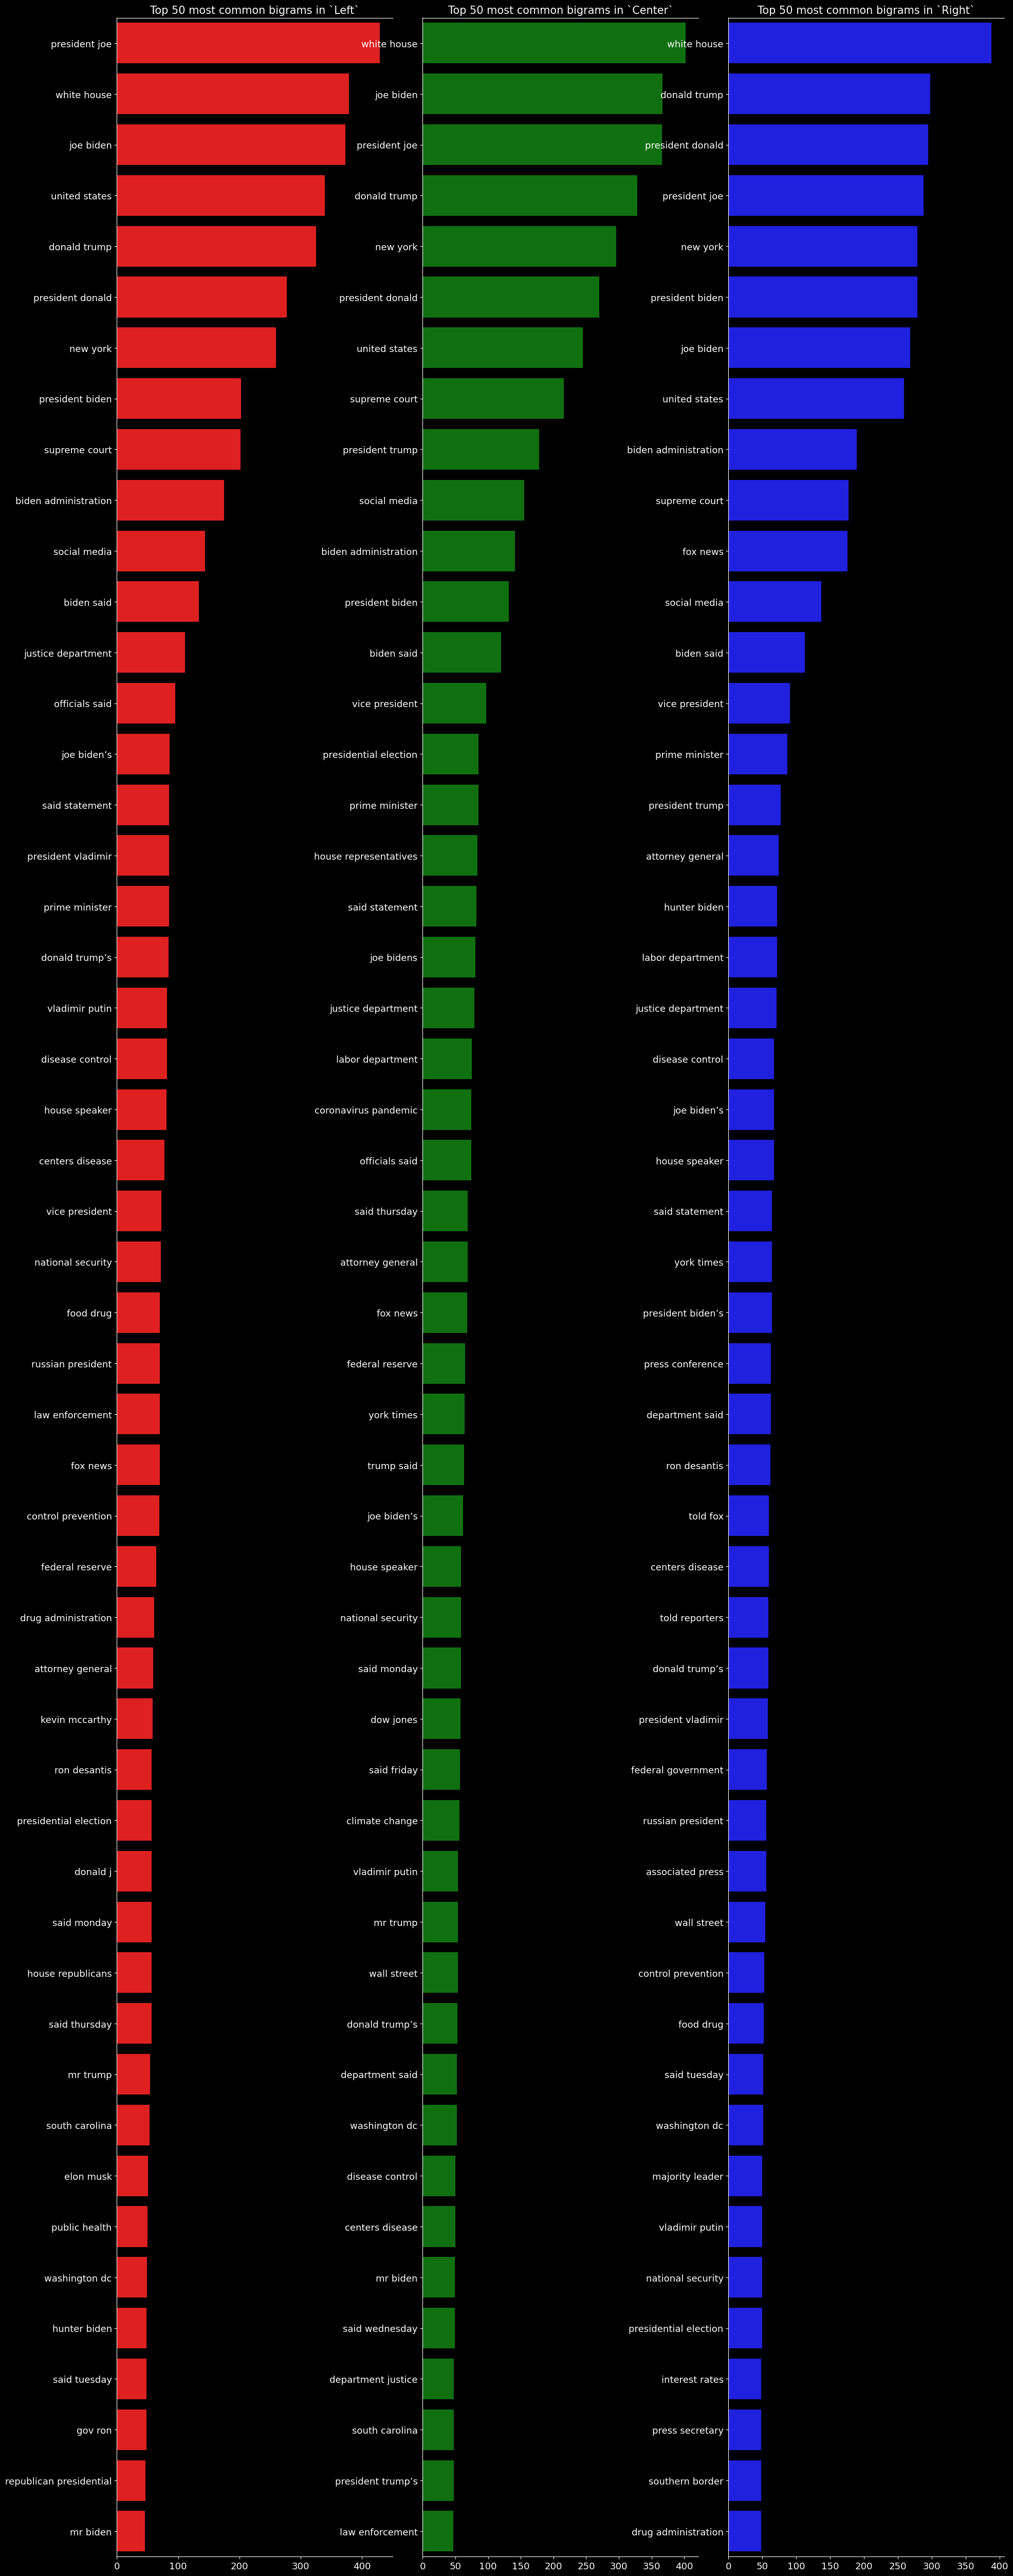

In [155]:
# Define the figure size and axis for plotting
fig, axes = plt.subplots(ncols=3, figsize=(18, 50), dpi=100)
plt.tight_layout()

# Plot the top 50 most common bigrams in left, center and right
sns.barplot(y=df_left_bigrams[0].values[:N], x=df_left_bigrams[1].values[:N], ax=axes[0], color='red')
sns.barplot(y=df_center_bigrams[0].values[:N], x=df_center_bigrams[1].values[:N], ax=axes[1], color='green')
sns.barplot(y=df_right_bigrams[0].values[:N], x=df_right_bigrams[1].values[:N], ax=axes[2], color='blue')

for i in range(3):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize=13)
    axes[i].tick_params(axis='y', labelsize=13)

axes[0].set_title(f'Top {N} most common bigrams in `Left`', fontsize=15)
axes[1].set_title(f'Top {N} most common bigrams in `Center`', fontsize=15)
axes[2].set_title(f'Top {N} most common bigrams in `Right`', fontsize=15)

plt.show()

In [153]:
# Trigrams

left_trigrams = defaultdict(int)
center_trigrams = defaultdict(int)
right_trigrams = defaultdict(int)

for text in df[df['label']=='left']['value']:
    for word in gram(text,n_gram=3):
        left_trigrams[word] += 1

for text in df[df['label']=='center']['value']:
    for word in gram(text,n_gram=3):
        center_trigrams[word] += 1

for text in df[df['label']=='right']['value']:
    for word in gram(text,n_gram=3):
        right_trigrams[word] += 1


df_left_trigrams = pd.DataFrame(sorted(left_trigrams.items(), key=lambda x: x[1])[::-1])
df_center_trigrams = pd.DataFrame(sorted(center_trigrams.items(), key=lambda x: x[1])[::-1])
df_right_trigrams = pd.DataFrame(sorted(right_trigrams.items(), key=lambda x: x[1])[::-1])

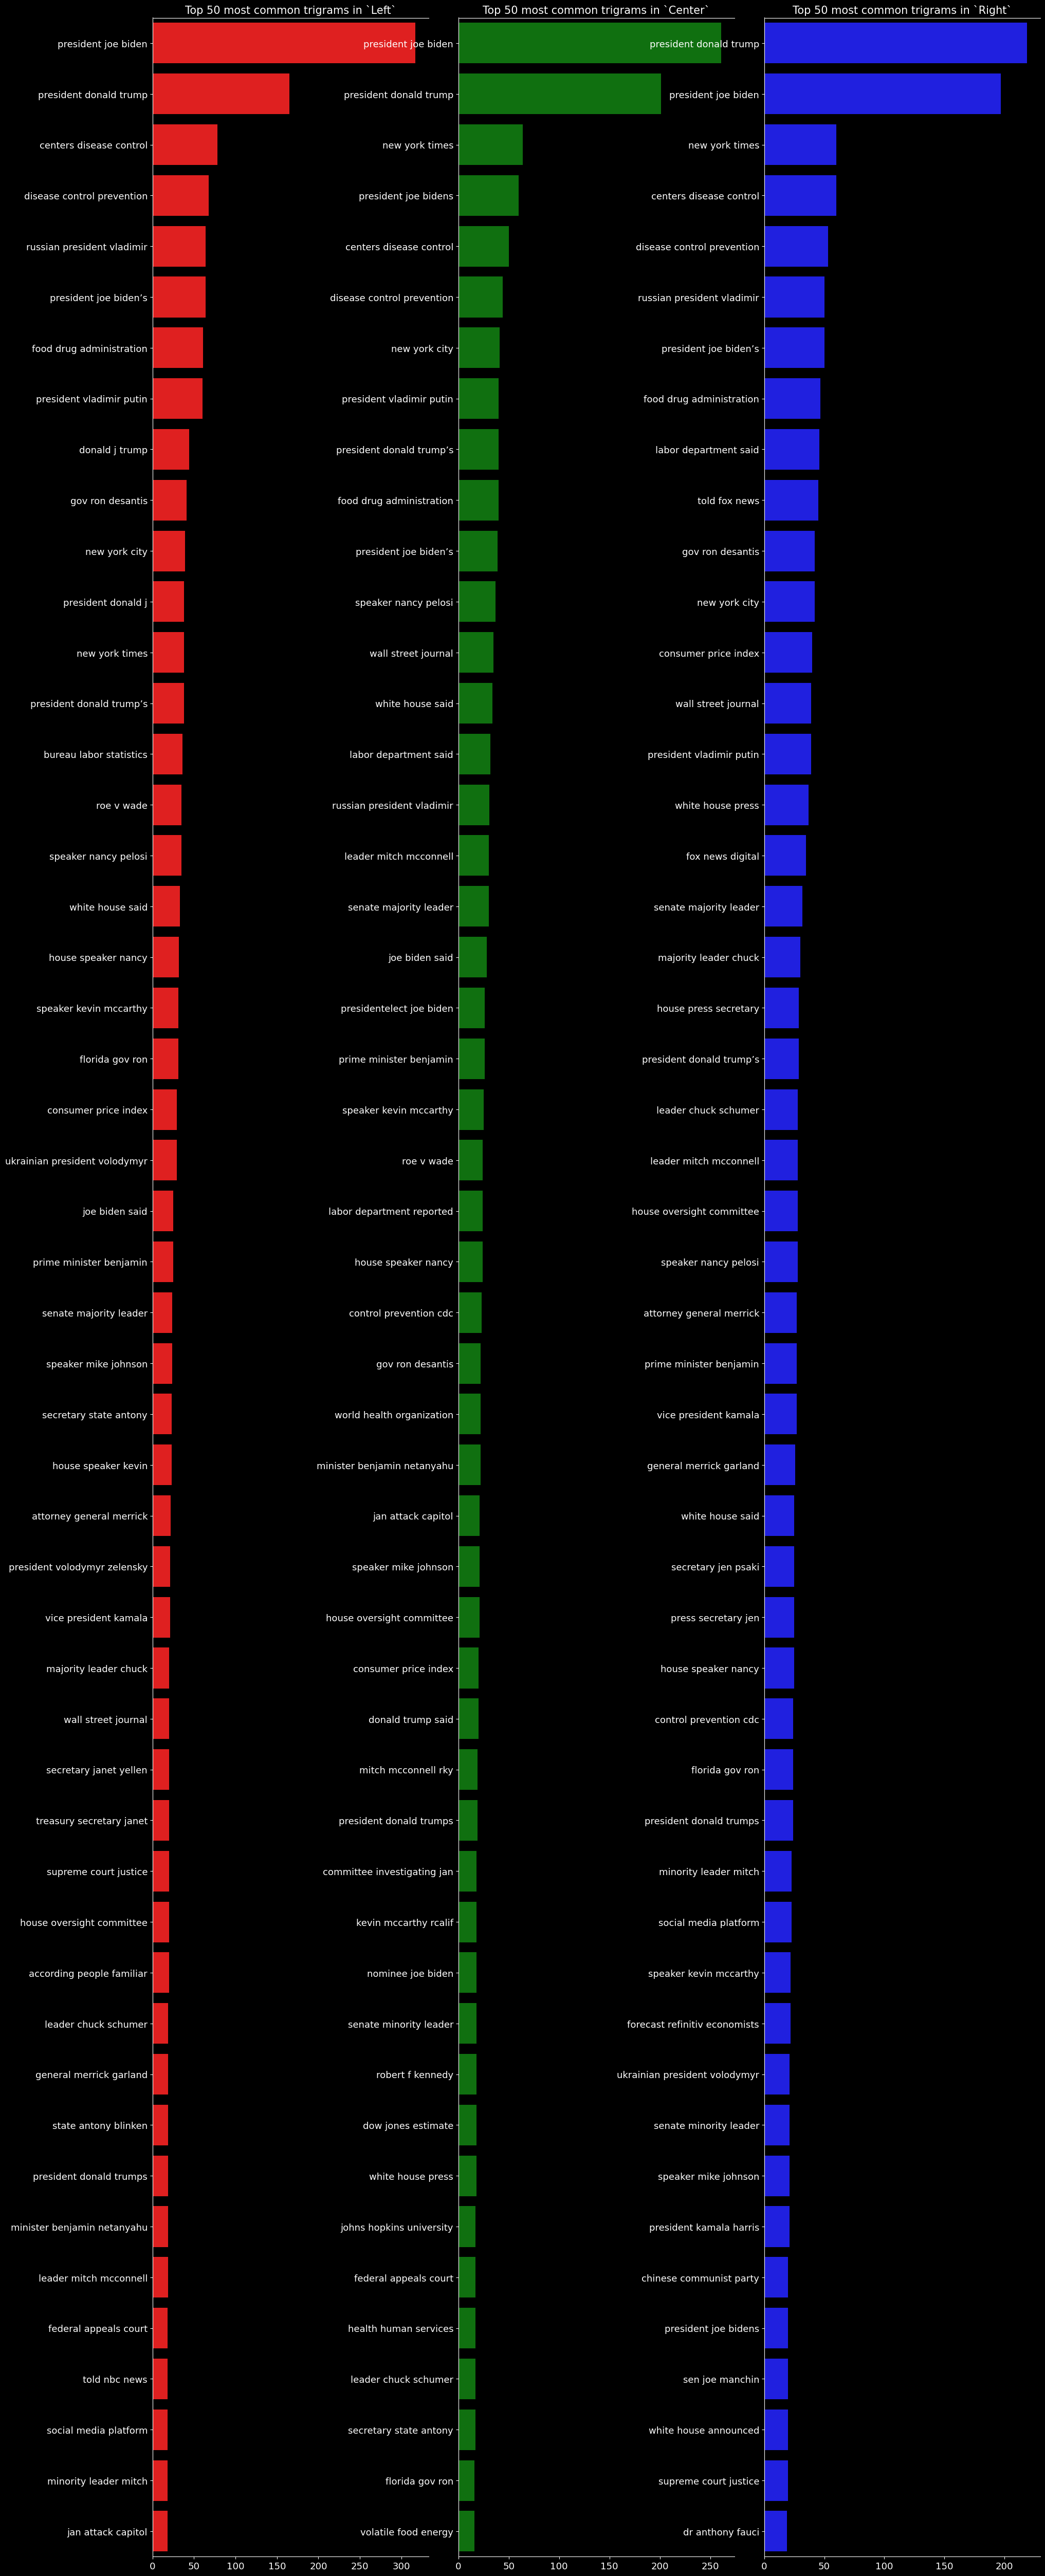

In [156]:
# Define the figure size and axis for plotting
fig, axes = plt.subplots(ncols=3, figsize=(18, 50), dpi=100)
plt.tight_layout()

# Plot the top 50 most common bigrams in left, center and right
sns.barplot(y=df_left_trigrams[0].values[:N], x=df_left_trigrams[1].values[:N], ax=axes[0], color='red')
sns.barplot(y=df_center_trigrams[0].values[:N], x=df_center_trigrams[1].values[:N], ax=axes[1], color='green')
sns.barplot(y=df_right_trigrams[0].values[:N], x=df_right_trigrams[1].values[:N], ax=axes[2], color='blue')

for i in range(3):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize=13)
    axes[i].tick_params(axis='y', labelsize=13)

axes[0].set_title(f'Top {N} most common trigrams in `Left`', fontsize=15)
axes[1].set_title(f'Top {N} most common trigrams in `Center`', fontsize=15)
axes[2].set_title(f'Top {N} most common trigrams in `Right`', fontsize=15)

plt.show()

## `Tokenization`

In [ ]:
# SPacy Stopwords
nlp = English()

def tokenisation_spacy(text,nlp):
    # tokenizer from spacy which by default is for english including punctuation rules and exceptions
    tokenizer = nlp.tokenizer
    tokens = tokenizer(text)
    #list of tokens
    return [token for token in tokens]
    

df['text_tokens'] = df['value'].apply(lambda x : tokenisation_spacy(x,nlp))


In [ ]:
df

,label,value,len,text_tokens
31395,left,much of the media’s attention focused on mille...,201,"[much, of, the, media, ’s, attention, focused,..."
27397,center,but provisional results showed virtually,40,"[but, provisional, results, showed, virtually]"
9140,right,for my entire professional life i have been en...,202,"[for, my, entire, professional, life, i, have,..."
6371,right,harvard university on tuesday received a compl...,448,"[harvard, university, on, tuesday, received, a..."
24928,center,as russia threatens the largest land invasion ...,460,"[as, russia, threatens, the, largest, land, in..."
...,...,...,...,...
22474,center,biden on wednesday officially endorsed the ide...,110,"[biden, , on, wednesday, officially, endorsed..."
18471,left,as of thursday night many twitter employees ha...,111,"[as, of, thursday, night, many, twitter, emplo..."
11660,right,the national weather service nws has issued ai...,329,"[the, national, weather, service, nws, has, is..."
13768,center,why is the writers guild of america threatenin...,56,"[why, is, the, writers, guild, of, america, th..."


## Removing `Stopwords`

In [ ]:
# A function to remove all the stopwords belonging to English lang
def remove_stopwords(text):
    """
    Removing stopwords belonging to english language
    
    """
    words = [w for w in text if w not in stop]
    return words

In [ ]:
# Use of lambda function to removing stopwords
%%time
df['text_tokens'] = df['text_tokens'].apply(lambda x : remove_stopwords(x))

CPU times: total: 9.34 s
Wall time: 9.91 s


## Normalisation

Token normalisation means converting different tokens to their base forms. This can be done either by:

**Lemmatization**: Returns the base or dictionary form of a word, which is known as the lemma

In [ ]:
def lemmatize_words(words):
    """
    Lemmatizing tokens of text
    """
    lemmatizer = WordNetLemmatizer()
    
    #because tokens in 'text_tokens' list is a spacy token so converting it to normal string
    words = [str(word) for word in words]
    lemmatized_words = [lemmatizer.lemmatize(word, wordnet.VERB) for word in words]  
    return lemmatized_words

In [ ]:
%%time
df['text_tokens'] = df['text_tokens'].apply(lambda x: lemmatize_words(x))


CPU times: total: 8.53 s
Wall time: 9.12 s


In [ ]:
# Convert the tokens into the sentences again
def join_clean_text(text_tokens):
        # join clean tokens and remake the text
    return ' '.join(text_tokens)

df['clean_text'] = df['text_tokens'].apply(lambda x : join_clean_text(x))

In [ ]:
df  = df[['label','clean_text']]

In [ ]:
# Renaming the column
df.rename(columns = {'clean_text':'value'},inplace=True)

## Wordcloud

Now Visualising **left**, **right** and **center**

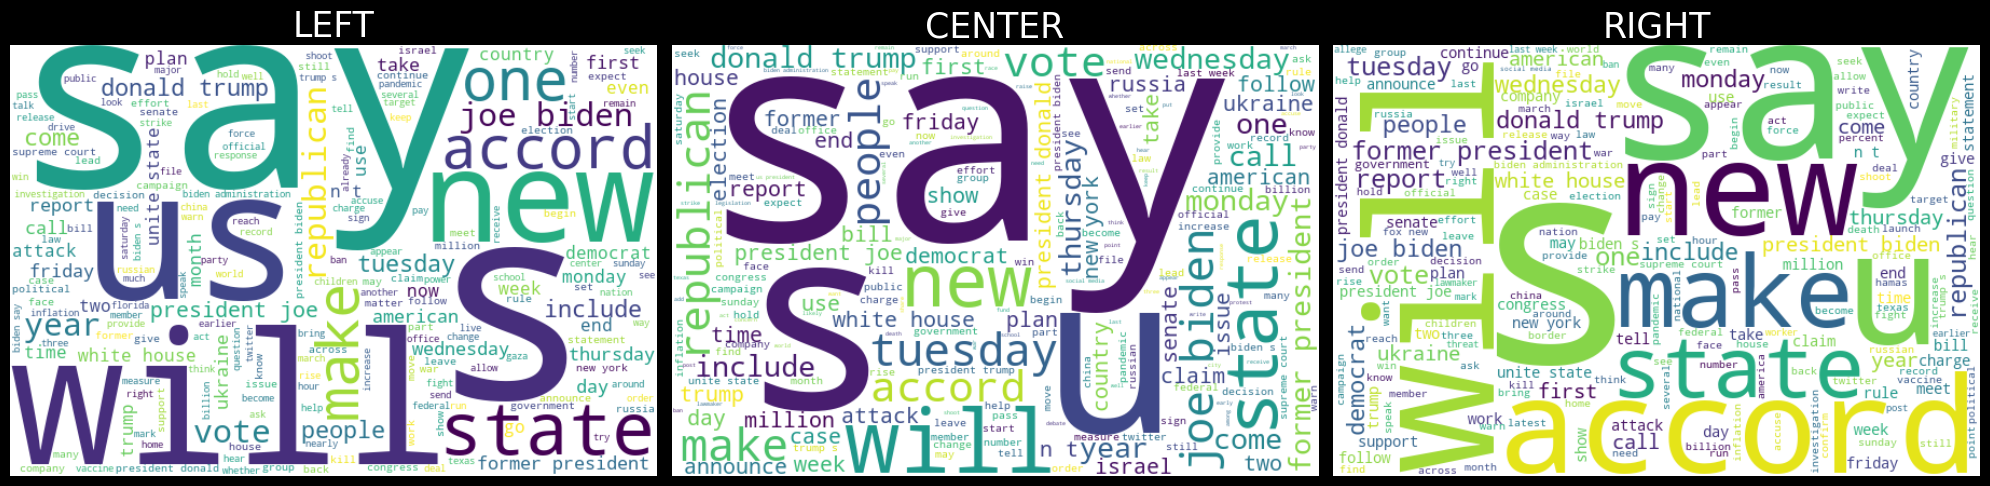

In [ ]:
# Function to generate word cloud from text and label
def generate_wordcloud(ax, text, label):
    wordcloud = WordCloud(width=600, height=400, background_color='white').generate(text)
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(f'{label}', fontsize=25)  # Adjust title fontsize here
    ax.axis('off')

# Create figure and axes for subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 10))

# Generate word clouds for each category
for i, category in enumerate(['left', 'center', 'right']):
    texts = ' '.join(df[df['label'] == category]['value'].tolist())
    
    generate_wordcloud(axes[i], texts, category.upper())

# Adjust layout and display
plt.tight_layout()
plt.show()


In [ ]:
## creating maps
label_map = {'left':0,'center':1,'right':2}
remap_label = {0:'left',1:'center',2:'right'}

In [ ]:

df['label'] = df['label'].map(label_map)

In [ ]:
df

,label,value
31395,0,much of the media ’s attention focus on milley...
27397,1,but provisional result show virtually
9140,2,for my entire professional life i have be enga...
6371,2,harvard university on tuesday receive a compla...
24928,1,as russia threaten the largest land invasion i...
...,...,...
22474,1,biden on wednesday officially endorse the id...
18471,0,as of thursday night many twitter employees ha...
11660,2,the national weather service nws have issue ai...
13768,1,why be the writers guild of america threaten a...


In [ ]:
#converting everything to string to avoid any errors
df['value'] = [str(item) for item in df['value']]

In [ ]:
## Splitting Train and Test

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df['value'], df['label'], test_size=0.25, random_state=42,stratify=df['label'])

## `Bag of words`

In this apporach we are using vanilla `Count Vectorizer` from `sklearn`

In [ ]:
# using bag of words, countvectorizer instance
count_vectorizer = CountVectorizer(max_features=5000)

# Fit_transform on X_train 
train_vectors = count_vectorizer.fit_transform(X_train)
# Transform on X_test
test_vectors = count_vectorizer.transform(X_test)

## Keeping only non-zero elements to preserve space 
print(train_vectors[0].todense())

[[0 0 0 ... 0 0 0]]


# <font color='skyblue'> Text Classification Logistic Regression model BOW </font>

In [ ]:
# Fitting a simple Logistic Regression on Bag of words
clf = LogisticRegression(C=1.0)
clf = clf.fit(train_vectors.toarray(), y_train.tolist())
predictions_bow = clf.predict(test_vectors)

f1_score(predictions_bow, y_test, average='macro')

0.4070295117801464

## <font color='skyblue'> BOW and Naive Bayes</font>

In [ ]:
# Fitting Multinomial Naive Bayes on Bag of words
clf_NB = MultinomialNB()
clf = clf_NB.fit(train_vectors.toarray(), y_train.tolist())
predictions_bow = clf.predict(test_vectors)

f1_score(predictions_bow, y_test, average='macro')

0.41178106449102625

## <font color='skyblue'> BOW and XGBoost</font>

In [ ]:
# Fitting XGboost on Bag of words
import xgboost as xgb
clf_xgb = xgb.XGBClassifier()

clf = clf_xgb.fit(train_vectors.toarray(), y_train.tolist())
predictions_bow = clf.predict(test_vectors)

f1_score(predictions_bow, y_test, average='macro')

0.18413794591445534

## `TF-IDF`

In [82]:
"""
filtering using `min_df` and `max_df` arguments and using only 'unigrams' and 'bigrams' and finally limiting to 
5k features
"""
tfidf = TfidfVectorizer(min_df=2, max_df=0.5, ngram_range=(1, 2),max_features=5000)
train_tfidf = tfidf.fit_transform(X_train)
test_tfidf = tfidf.transform(X_test)

# <font color='skyblue'> Text Classification Logistic Regression model TF-IDF </font>

In [83]:
# Fitting a simple Logistic Regression on TF-IDF
clf = LogisticRegression(C=1.0,random_state=0)
clf = clf.fit(train_tfidf.toarray(), y_train.tolist())
predictions_bow = clf.predict(test_tfidf)

f1_score(predictions_bow, y_test, average='macro')

0.4228327489496256

## <font color='skyblue'> TF-IDF and Naive Bayes</font>

In [84]:
# Fitting Multinomial Naive Bayes on TF-IDF
clf_NB = MultinomialNB()
clf = clf_NB.fit(train_tfidf.toarray(), y_train.tolist())
predictions_bow = clf.predict(test_tfidf)

f1_score(predictions_bow, y_test, average='macro')

0.4147344759048099

## <font color='skyblue'> TF-IDF and XGBoost</font>

In [85]:
# Fitting XGboost on TF-IDF
import xgboost as xgb
clf_xgb = xgb.XGBClassifier()

clf = clf_xgb.fit(train_tfidf.toarray(), y_train.tolist())
predictions_bow = clf.predict(test_tfidf)

f1_score(predictions_bow, y_test, average='macro')

0.23768959676006154

## `S-Bert`

### Converting the `X_train` and `X_test` into the sentence bert embeddings, we are using the Mini language model pre-trained embedding's form sentence transforments library. It will create a `384` by `1` vector embedding for each sentence

In [86]:
from sentence_transformers import SentenceTransformer

# Load the SentenceTransformer model
model = SentenceTransformer("all-MiniLM-L6-v2")

# Ensuring if X_train is a list
if isinstance(X_train, pd.Series):
    X_train = X_train.tolist()

# Calculate embeddings
length_sorted_idx = np.argsort([-len(sen) for sen in X_train])

sentences_sorted = [X_train[idx] for idx in length_sorted_idx]
embeddings = model.encode(sentences_sorted)
print(embeddings.shape)


(27375, 384)


In [87]:
# Embeddings for X_test

# Ensuring if X_test is a list
if isinstance(X_test, pd.Series):
    X_test = X_test.tolist()

# Calculate embeddings
length_sorted_idx = np.argsort([-len(sen) for sen in X_test])

sentences_sorted = [X_test[idx] for idx in length_sorted_idx]
embeddings_test = model.encode(sentences_sorted)

In [90]:
embeddings[0]

array([-2.80887578e-02,  7.42893480e-03,  1.19307386e-02,  5.61305173e-02,
        5.30037954e-02, -4.42269668e-02, -1.41858496e-02,  8.48245397e-02,
       -6.52283197e-03,  2.78218128e-02, -1.06443064e-02,  6.55589923e-02,
        8.00553337e-02,  7.92098269e-02, -8.31504092e-02, -6.91927001e-02,
        3.25554460e-02, -6.68620737e-03, -5.42255901e-02,  3.33300345e-02,
       -4.97628786e-02,  1.34984240e-01,  2.86903325e-02,  5.79418205e-02,
       -1.83165669e-02, -3.55807953e-02, -6.63402006e-02, -2.86105648e-02,
       -2.98010893e-02, -2.06361786e-02, -3.16101797e-02, -5.50492890e-02,
       -2.99189650e-02, -7.28101432e-02,  1.49314525e-03, -2.69682985e-02,
        2.73668431e-02,  1.21461963e-02, -9.39721242e-03,  2.98667438e-02,
        4.68542166e-02, -6.64770156e-02, -2.50430647e-02,  1.12221055e-02,
        1.25170639e-03,  2.02690950e-03, -1.05327681e-01, -4.13989834e-02,
        8.75372142e-02,  7.40405023e-02, -5.01942448e-02, -6.34999126e-02,
       -1.36530949e-02,  

In [91]:
# Fitting XGboost on S-Bert embeddings
import xgboost as xgb
clf_xgb = xgb.XGBClassifier()

# here we are not using the .toarray() becaue it you check the type of embeddings they are already in type `array`
clf = clf_xgb.fit(embeddings, y_train.tolist())
predictions_bow = clf.predict(embeddings_test)

f1_score(predictions_bow, y_test, average='macro')

0.3295855091998124

In [92]:
# Fitting a simple Logistic Regression on S-Bert embeddings
clf = LogisticRegression(C=1.0,random_state=0)

# here again we are not using the .toarray() becaue it you check the type of embeddings they are already in type `array`
clf = clf.fit(embeddings, y_train.tolist())
predictions_bow = clf.predict(embeddings_test)

f1_score(predictions_bow, y_test, average='macro')

0.3352483202937317

### Takeaways:

* From all these models and vectorization methods we can say, right now TF-IDF and BoW of words are giving us the better `F1-score` as compare to `S-Bert`, even in `TF-IDF` and `BoW` , `TF-IDF` with `MultinomialNB()` give us best `F1-Score` and `XG-Boost` give us worst score among all. 

### Future Scope:

* To improve the model score and get better results, in future we can Fine tune S-Bert pre-trained model on our own dataset to get domain specific embeddings which helps in the better way to our model and I case of models we can try different approches like `ADA-Boost` or `RandomForest` or we can scrap more data from `allsides.com` and then use ANN model on it. If we think about it's business prospective we can developed a dedicated frontend for it along with a encrypted API which can be consumed by news agences to show whether the published news is highly biased or nutral. We can developed a scaleable instance of it on clouds which will help use to setup a money making model on it too. 

# <div align="center"><strong>END of Notebook</strong></div>